https://youtu.be/iY8AUb6I63U?si=Da2hrmL2N8-OFRoq


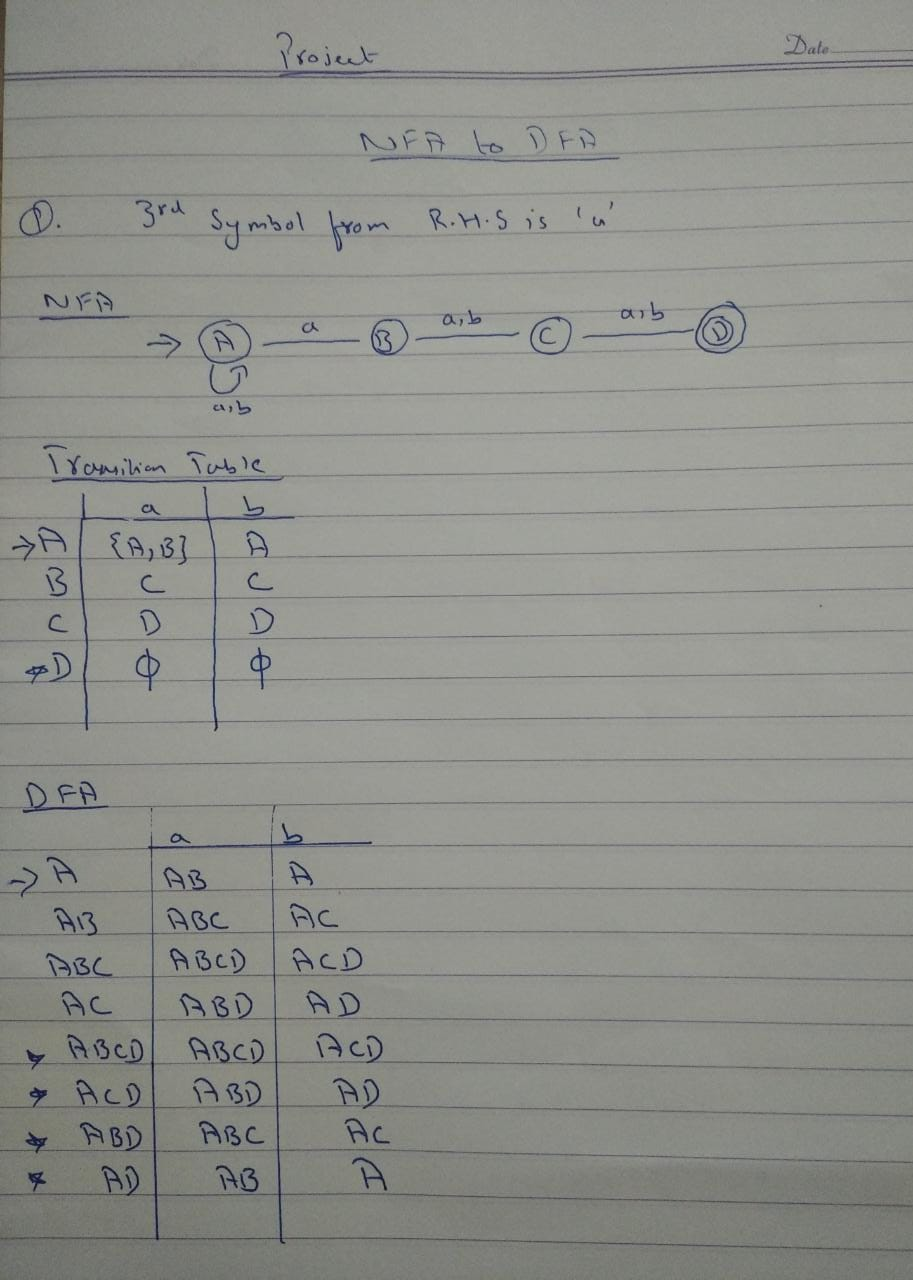

In [ ]:

import pandas as pd

# Taking NFA input from User 

nfa = {}                                 
n = int(input("No. of states : "))            #Enter total no. of states
t = int(input("No. of transitions : "))       #Enter total no. of transitions/paths eg: a,b so input 2 for a,b,c input 3
for i in range(n):  
    state = input("state name : ")            #Enter state name eg: A, B, C, q1, q2 ..etc
    nfa[state] = {}                           #Creating a nested dictionary
    for j in range(t):
        path = input("path : ")               #Enter path eg : a or b in {a,b} 0 or 1 in {0,1}
        print("Enter end state from state {} travelling through path {} : ".format(state,path))
        reaching_state = [x for x in input().split()]  #Enter all the end states that 
        nfa[state][path] = reaching_state     #Assigning the end states to the paths in dictionary

print("\nNFA :- \n")
print(nfa)                                    #Printing NFA
print("\nPrinting NFA table :- ")
nfa_table = pd.DataFrame(nfa)
print(nfa_table.transpose())

print("Enter final state of NFA : ")
nfa_final_state = [x for x in input().split()]      # Enter final state/states of NFA
###################################################                 
    
new_states_list = []                          #holds all the new states created in dfa
dfa = {}                                      #dfa dictionary/table or the output structure we needed
keys_list = list(list(nfa.keys())[0])         #conatins all the states in nfa plus the states created in dfa are also appended further
path_list = list(nfa[keys_list[0]].keys())    #list of all the paths eg: [a,b] or [0,1]

###################################################

# Computing first row of DFA transition table

dfa[keys_list[0]] = {}                               #creating a nested dictionary in dfa 
for y in range(t):
    var = "".join(nfa[keys_list[0]][path_list[y]])   #creating a single string from all the elements of the list which is a new state
    dfa[keys_list[0]][path_list[y]] = var            #assigning the state in DFA table
    if var not in keys_list:                         #if the state is newly created 
        new_states_list.append(var)                  #then append it to the new_states_list
        keys_list.append(var)                        #as well as to the keys_list which contains all the states
        
###################################################
 
# Computing the other rows of DFA transition table

while len(new_states_list) != 0:                     #consition is true only if the new_states_list is not empty
    dfa[new_states_list[0]] = {}                     #taking the first element of the new_states_list and examining it
    for _ in range(len(new_states_list[0])):
        for i in range(len(path_list)):
            temp = []                                #creating a temporay list
            for j in range(len(new_states_list[0])):
                temp += nfa[new_states_list[0][j]][path_list[i]]  #taking the union of the states
            s = ""
            s = s.join(temp)                         #creating a single string(new state) from all the elements of the list
            if s not in keys_list:                   #if the state is newly created
                new_states_list.append(s)            #then append it to the new_states_list
                keys_list.append(s)                  #as well as to the keys_list which contains all the states
            dfa[new_states_list[0]][path_list[i]] = s   #assigning the new state in the DFA table
        
    new_states_list.remove(new_states_list[0])       #Removing the first element in the new_states_list

print("\nDFA :- \n")    
print(dfa)                                           #Printing the DFA created
print("\nPrinting DFA table :- ")
dfa_table = pd.DataFrame(dfa)
print(dfa_table.transpose())

dfa_states_list = list(dfa.keys())
dfa_final_states = []
for x in dfa_states_list:
    for i in x:
        if i in nfa_final_state:
            dfa_final_states.append(x)
            break
        
print("\nFinal states of the DFA are : ",dfa_final_states)       #Printing Final states of DFA

"""
4
2
A
a
A B
b
A
B
a
C
b
C
C
a
D
b
D
D
a

b

D


"""
"""
# Code Ouput Example

No. of states : 4
No. of transitions : 2
state name : A
path : a
Enter end state from state A travelling through path a : 
A B
path : b
Enter end state from state A travelling through path b : 
A
state name : B
path : a
Enter end state from state B travelling through path a : 
C
path : b
Enter end state from state B travelling through path b : 
C
state name : C
path : a
Enter end state from state C travelling through path a : 
D
path : b
Enter end state from state C travelling through path b : 
D
state name : D
path : a
Enter end state from state D travelling through path a : 
Enter
path : b
Enter end state from state D travelling through path b : 
Enter


NFA :- 

{'A': {'a': ['A', 'B'], 'b': ['A']}, 'B': {'a': ['C'], 'b': ['C']}, 'C': {'a': ['D'], 'b': ['D']}, 'D': {'a': [], 'b': []}}

Printing NFA table :- 
        a    b
A  [A, B]  [A]
B     [C]  [C]
C     [D]  [D]
D      []   []
Enter final state of NFA : 
D

DFA :- 

{'A': {'a': 'AB', 'b': 'A'}, 'AB': {'a': 'ABC', 'b': 'AC'}, 'ABC': {'a': 'ABCD', 'b': 'ACD'}, 'AC': {'a': 'ABD', 'b': 'AD'}, 'ABCD': {'a': 'ABCD', 'b': 'ACD'}, 'ACD': {'a': 'ABD', 'b': 'AD'}, 'ABD': {'a': 'ABC', 'b': 'AC'}, 'AD': {'a': 'AB', 'b': 'A'}}

Printing DFA table :- 
         a    b
A       AB    A
AB     ABC   AC
ABC   ABCD  ACD
AC     ABD   AD
ABCD  ABCD  ACD
ACD    ABD   AD
ABD    ABC   AC
AD      AB    A

Final states of the DFA are :  ['ABCD', 'ACD', 'ABD', 'AD']


"""



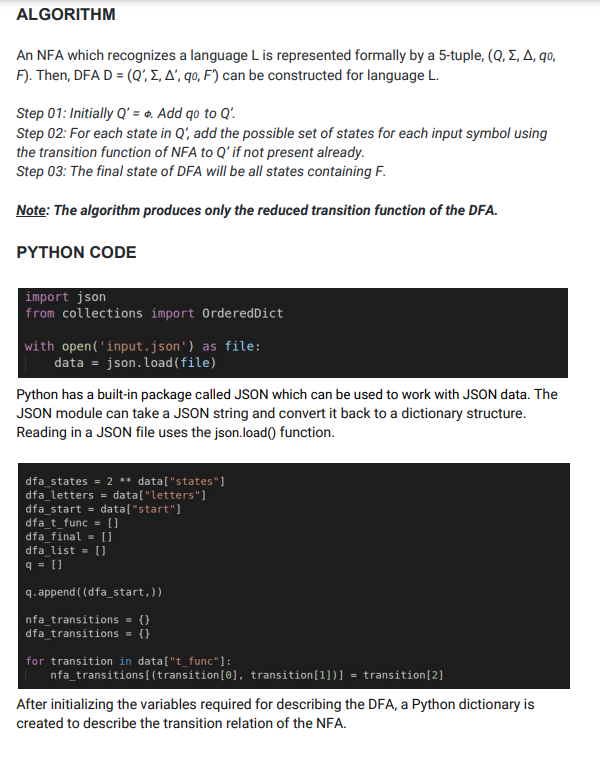
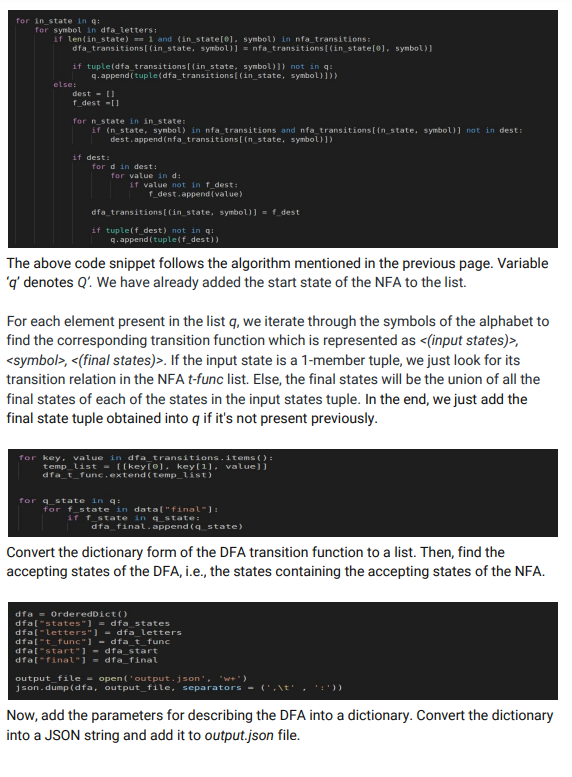
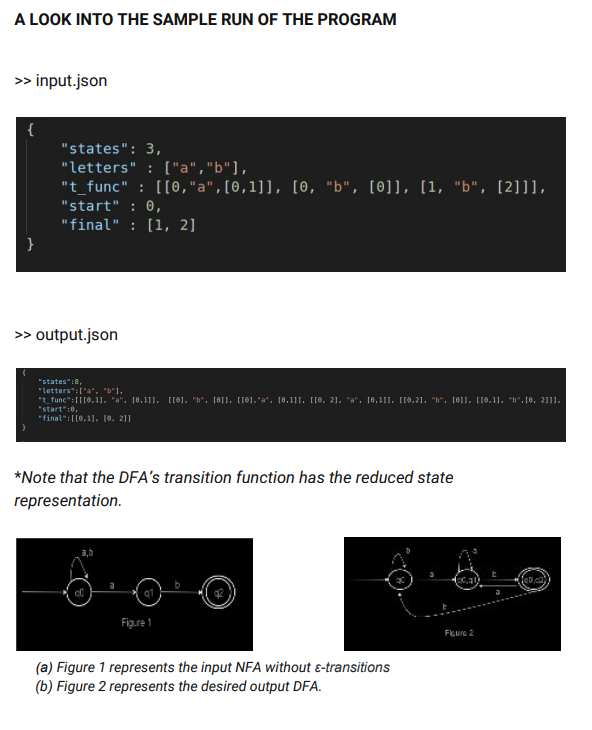

In [ ]:
import json
from collections import OrderedDict

with open('input.json') as file:
    data = json.load(file)

dfa_states = 2 ** data["states"]
dfa_letters = data["letters"]
dfa_start = data["start"]
dfa_t_func = []
dfa_final = []
dfa_list = []
q = []

q.append((dfa_start,))

nfa_transitions = {}
dfa_transitions = {}

for transition in data["t_func"]:
    nfa_transitions[(transition[0], transition[1])] = transition[2]

for in_state in q:
    for symbol in dfa_letters:
        if len(in_state) == 1 and (in_state[0], symbol) in nfa_transitions:
            dfa_transitions[(in_state, symbol)] = nfa_transitions[(in_state[0], symbol)]

            if tuple(dfa_transitions[(in_state, symbol)]) not in q:
                q.append(tuple(dfa_transitions[(in_state, symbol)]))
        else:
            dest = []
            f_dest =[]

            for n_state in in_state:
                if (n_state, symbol) in nfa_transitions and nfa_transitions[(n_state, symbol)] not in dest:
                    dest.append(nfa_transitions[(n_state, symbol)])
            
            if dest:
                for d in dest:
                    for value in d:
                        if value not in f_dest:
                            f_dest.append(value)
            
                dfa_transitions[(in_state, symbol)] = f_dest 

                if tuple(f_dest) not in q: 
                    q.append(tuple(f_dest))

for key, value in dfa_transitions.items():
    temp_list = [[key[0], key[1], value]]
    dfa_t_func.extend(temp_list)


for q_state in q:
    for f_state in data["final"]:
        if f_state in q_state:
            dfa_final.append(q_state)

dfa = OrderedDict()
dfa["states"] = dfa_states
dfa["letters"] = dfa_letters
dfa["t_func"] = dfa_t_func
dfa["start"] = dfa_start
dfa["final"] = dfa_final

output_file = open('output.json', 'w+')
json.dump(dfa, output_file, separators = (',\t' , ':'))     